In [231]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from detector_compare import *

In [115]:
image1 = cv2.imread(r"image/00125.JPG")
image2 = cv2.imread(r"image/00128.JPG")

In [19]:
sift,surf,orb = create_detector()

In [20]:
keypoints1,descriptor1 = sift.detectAndCompute(image1,None)
keypoints2,descriptor2 = sift.detectAndCompute(image2,None)

In [21]:
matcher = cv2.DescriptorMatcher.create("BruteForce")
matches = matcher.knnMatch(descriptor1,descriptor2,1)

In [22]:
dst_pts = np.float32([keypoints1[match[0].queryIdx].pt for match in matches])
src_pts = np.float32([keypoints2[match[0].trainIdx].pt for match in matches])

In [69]:
image1_noisy = noise_image(image1)

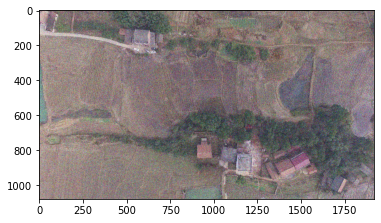

In [123]:
display(image1_noisy)

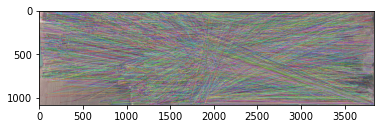

In [124]:
dst_pts_sift, src_pts_sift = detect_and_match(sift,image1,image1_noisy)

In [125]:
sift_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_sift - src_pts_sift , 2), axis=1)) < 10 ) / len(dst_pts_sift)
sift_res

0.05570890840652447

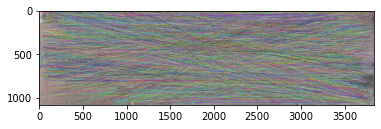

In [126]:
dst_pts_surf,src_pts_surf = detect_and_match(surf,image1,image1_noisy)

In [127]:
surf_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_surf - src_pts_surf, 2), axis=1)) < 10 ) / len(dst_pts_surf)
surf_res

0.1219623191043961

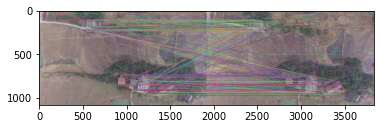

In [128]:
dst_pts_orb,src_pts_orb = detect_and_match(orb,image1,image1_noisy)

In [130]:
orb_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_orb - src_pts_orb, 2), axis=1)) < 10 ) / len(dst_pts_orb)
orb_res

0.448

In [84]:
np.abs(dst_pts_surf - src_pts_surf) < 1

array([[ True,  True],
       [False, False],
       [ True,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])

In [149]:
image1_light = light_image(image1.copy())

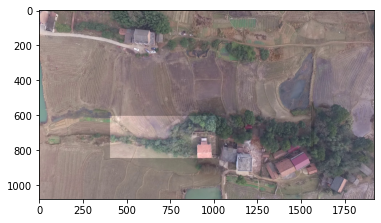

In [150]:
display(image1_light)

0.9892095357590966

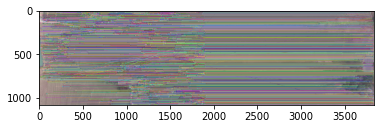

In [151]:
dst_pts_sift, src_pts_sift = detect_and_match(sift,image1,image1_light)
sift_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_sift - src_pts_sift , 2), axis=1)) < 10 ) / len(dst_pts_sift)
sift_res

0.9641394375170657

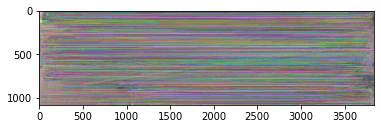

In [152]:
dst_pts_surf, src_pts_surf = detect_and_match(surf,image1,image1_light)
surf_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_surf - src_pts_surf , 2), axis=1)) < 10 ) / len(dst_pts_surf)
surf_res

0.908

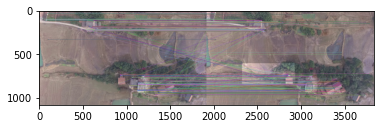

In [153]:
dst_pts_orb, src_pts_orb = detect_and_match(orb,image1,image1_light)
orb_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_orb - src_pts_orb , 2), axis=1)) < 10 ) / len(dst_pts_orb)
orb_res

In [142]:
a = np.random.random_integ

椒盐噪声

In [161]:
image1_sp_noisy = noise_image2(image1,0.05)

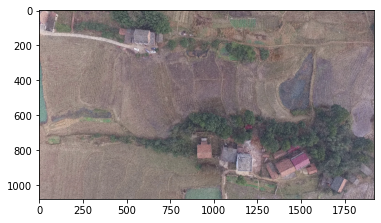

In [162]:
display(image1_sp_noisy)

0.15809284818067754

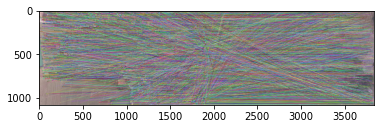

In [163]:
dst_pts_sift, src_pts_sift = detect_and_match(sift,image1,image1_sp_noisy)
sift_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_sift - src_pts_sift , 2), axis=1)) < 10 ) / len(dst_pts_sift)
sift_res

0.1219623191043961

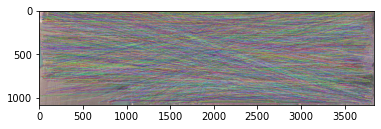

In [164]:
dst_pts_surf, src_pts_surf = detect_and_match(surf,image1,image1_noisy)
surf_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_surf - src_pts_surf , 2), axis=1)) < 10 ) / len(dst_pts_surf)
surf_res

0.448

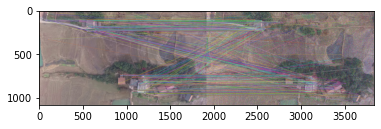

In [165]:
dst_pts_orb, src_pts_orb = detect_and_match(orb,image1,image1_noisy)
orb_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_orb - src_pts_orb , 2), axis=1)) < 10 ) / len(dst_pts_orb)
orb_res

旋转

In [228]:
# 45
mat,image1_rotate = rotate_image(image1,25)

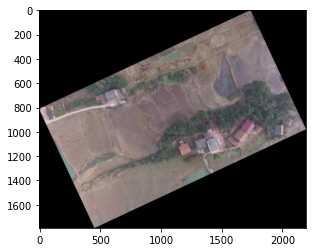

In [229]:
display(image1_rotate)

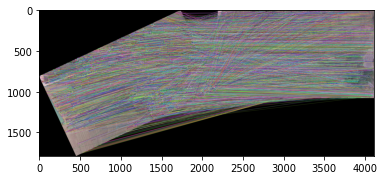

In [219]:
dst_pts_sift, src_pts_sift = detect_and_match(sift,image1_rotate,image1)
src_pts_sift_trans = mat @ np.vstack((src_pts_sift.T,np.ones((src_pts_sift.shape[0]))))

In [220]:
sift_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_sift - src_pts_sift_trans.T , 2), axis=1)) < 10 ) / len(dst_pts_sift)
sift_res

0.6447939262472885

In [221]:
a = np.random.random((10,2))

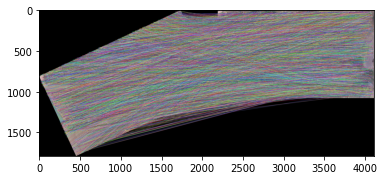

In [224]:
dst_pts_surf, src_pts_surf = detect_and_match(surf,image1_rotate,image1)
src_pts_surf_trans = mat @ np.vstack((src_pts_surf.T,np.ones((src_pts_surf.shape[0]))))

In [225]:
surf_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_surf - src_pts_surf_trans.T , 2), axis=1)) < 10 ) / len(dst_pts_surf)
surf_res

0.48491590282103764

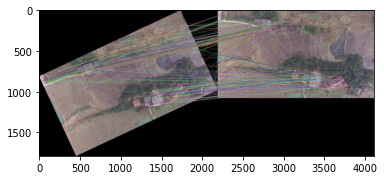

In [226]:
dst_pts_orb, src_pts_orb = detect_and_match(orb,image1_rotate,image1)
src_pts_orb_trans = mat @ np.vstack((src_pts_orb.T,np.ones((src_pts_orb.shape[0]))))

In [227]:
orb_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_orb - src_pts_orb_trans.T , 2), axis=1)) < 10 ) / len(dst_pts_orb)
orb_res

0.692

缩放

In [232]:
ratio = 0.6
image1_resize = image_resize(image1,0.6)

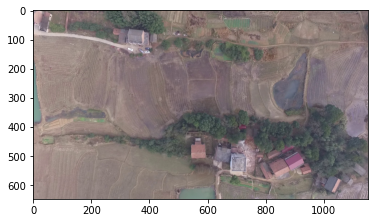

In [233]:
display(image1_resize)

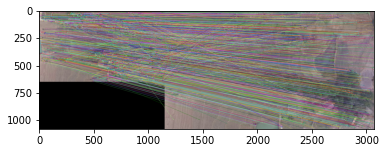

In [234]:
dst_pts_sift, src_pts_sift = detect_and_match(sift,image1_resize,image1)
src_pts_sift_trans = src_pts_sift * ratio

In [236]:
sift_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_sift - src_pts_sift_trans , 2), axis=1)) < 10 ) / len(dst_pts_sift)
sift_res

0.7512747875354108

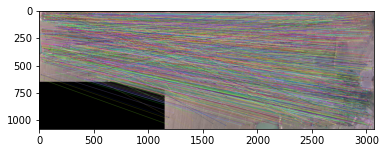

In [240]:
dst_pts_surf, src_pts_surf = detect_and_match(surf,image1_resize,image1)
src_pts_surf_trans = src_pts_surf * ratio

In [241]:
surf_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_surf - src_pts_surf_trans , 2), axis=1)) < 10 ) / len(dst_pts_surf)
surf_res

0.7214386459802539

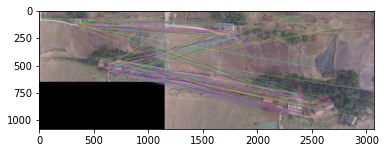

In [243]:
dst_pts_orb, src_pts_orb = detect_and_match(orb,image1_resize,image1)
src_pts_orb_trans = src_pts_orb *ratio

In [244]:
orb_res = np.count_nonzero(np.sqrt(np.sum(np.power(dst_pts_orb - src_pts_orb_trans , 2), axis=1)) < 10 ) / len(dst_pts_orb)
orb_res

0.546